# 디지털 영상 기초

## RGB 컬러 영상을 채널별로 구분해 디스플레이하기

In [3]:
import cv2 as cv
import sys

img = cv.imread('./data/ch2/soccer.jpg')

if img is None:
    sys.exit('파일을 찾을 수 없습니다')
    
print(img.shape)
    
cv.imshow('original_RGB', img)
cv.imshow('Upper left half', img[0 : img.shape[0] // 2, 0 : img.shape[1] // 2, :]) # 왼쪽 위 부분을
cv.imshow('Center half', img[img.shape[0] // 4 : 3 * img.shape[0] // 4, 
                             img.shape[1] // 4 : 3 * img.shape[1] // 4, 
                             :]) # 첫 번째와 두 번재 축을 1/4부터 3/4까지 지정해 영상의 중간 부분을

cv.imshow('R channel', img[:, :, 2]) # 빨간색 부분이 밝게
cv.imshow('G channel', img[:, :, 1]) # 초록색 부분이 밝게
cv.imshow('B channel', img[:, :, 0]) # 파란색 부분이 밝게

cv.waitKey()
cv.destroyAllWindows()

(948, 1434, 3)


=> 검은색은 모든 채널에서 어둡게, 흰 부분은 모든 부분에서 밝게 나온다

# 이진 영상

이진 영상 : 화소가 0(흑) 또는 1(백)인 영상이다

## 이진화

[[ 98  99  94 ... 100 106 105]
 [ 95  95  93 ... 104 102 102]
 [ 92  92  91 ...  97 103 103]
 ...
 [144 141 139 ... 129 126 127]
 [145 141 138 ... 127 125 125]
 [144 143 140 ... 125 125 125]]
(948, 1434)


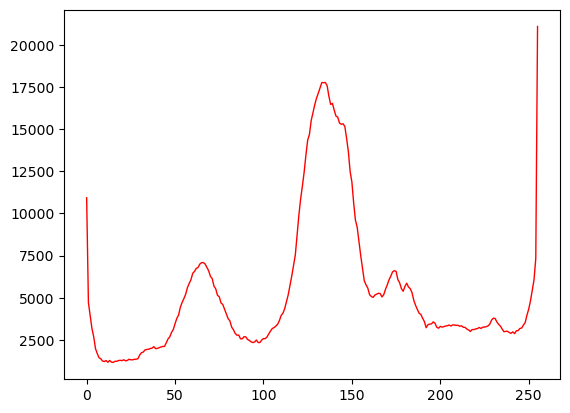

In [7]:
# 컬러 영상에서 R 채널을 분리해 명암 영상으로 간주해 히스토그램 구하기

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('./data/ch2/soccer.jpg')
h = cv.calcHist([img], [2], None, [256], [0, 256]) # ([영상], [채널(2 : red)], [히스토그램을 구할 영역 None : 전체에서], [히스토그램의 칸의 수], [세어볼 명암값의 범위])
plt.plot(h, color = 'r', linewidth = 1);

print(img[:, :, 2]) # 채널 R에 저장된 값([B:G:R])
print(img[:, :, 2].shape) # 채널 R의 크기

## 오츄 알고리즘

In [8]:
# 오츄 알고리즘으로 인진화하기

import cv2 as cv
import sys

img = cv.imread('./data/ch2/soccer.jpg')

# t : 최적 임계값, bin_img : 이진화 된 영상
t, bin_img = cv.threshold(img[:, :, 2], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) # (이진화 할 채널, 명암값의 범위, 명암값의 범위, 오츄 알고리즘으로 이진화 수행)
print('오츄 알고리즘이 찾은 최적 임계값 = ', t)

cv.imshow('R channel', img[:, :, 2]) # R 체널 영상
cv.imshow('R channel binarization', bin_img) # R 채널 이진화 영상

cv.waitKey()
cv.destroyAllWindows()

오츄 알고리즘이 찾은 최적 임계값 =  113.0


## 모폴로지

모폴로지 : 영상을 변환하는 과정에서 하나의 물체가 여러 영역으로 분리되거나 다른 물체가 한 영역으로 붙는 경우를 누그러뜨리기 위해 모폴로지 연산을 사용

팽창 : 구조 요소의 중심을 1인 화소에 씌운 다음 구조 요소에 해당하는 모든 화소를 1로 변경

    0 1(p) 0 -> 1 1 1 

침식 : 구조 요소의 중심을 1인 화소 P에 씌운 다음 구조 요소에 해당하는 모든 화소가 1인 경우에 P를 1로 유지하고 그렇지 않으면 0으로 변경

    0 1(p) 1 -> 0 0 1

(525, 1920, 4)


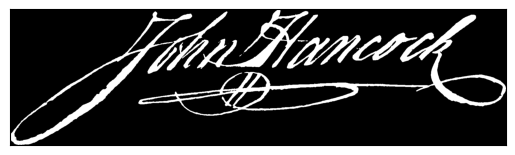

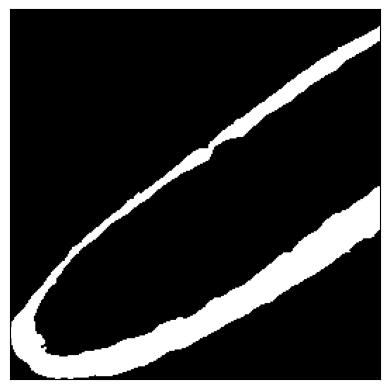

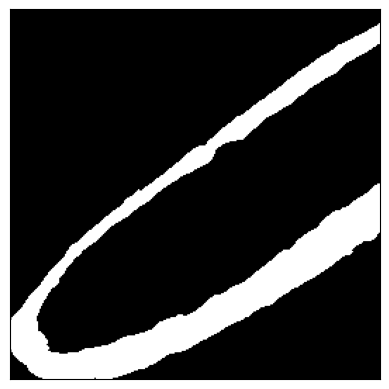

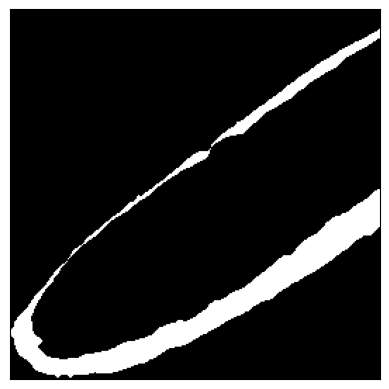

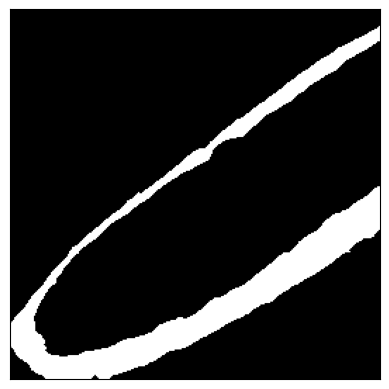

In [13]:
# 모폴로지 연산 적용하기

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('./data/ch3/JohnHancocksSignature.png', cv.IMREAD_UNCHANGED) # 서명 영상 읽어오기

print(img.shape) # (525, 1920, 4)

# 3번 채널이 서명을 담고 있다

t, bin_img = cv.threshold(img[:, :, 3], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) # 이미지의 3번 채널에 오츄 이진화 적용
plt.imshow(bin_img, cmap = 'gray') # 기본으로 명암 영상을 출력
plt.xticks([])
plt.yticks([])
plt.show()

# 모폴로지 효과를 확인할 목적으로 영상의 일부만 잘라서 저장, 잘라낸 패치를 디스플레이한다
b = bin_img[bin_img.shape[0] // 2 : bin_img.shape[0], 0 : bin_img.shape[0] // 2 + 1]
plt.imshow(b, cmap = 'gray')
plt.xticks([]) # 잘라내기
plt.yticks([])
plt.show()

# 두번째 구조 요소를 se 객체에 저장
# 모폴로지가 사용하는 구조 요소
se = np.uint8([[0, 0, 1, 0, 0],
               [0, 1, 1, 1, 0],
               [1, 1, 1, 1, 1],
               [0, 1, 1, 1, 0],
               [0, 0, 1, 0, 0]]) # 구조 요소

b_dilation = cv.dilate(b, se, iterations = 1) # 팽창 연산을 적용(iterations : 적용 횟수)
plt.imshow(b_dilation, cmap = 'gray') # 팽창을 적용한 영상을 디스플레이
plt.xticks([])
plt.yticks([])
plt.show()

# 침식을 적용하고 결과를 디스플레이한다
b_erosion = cv.erode(b, se, iterations = 1) # 침식
plt.imshow(b_erosion, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

# 팽창을 적용한 영상에 침식을 적용 -> 닫기 연산
b_closing = cv.erode(cv.dilate(b, se, iterations = 1), se, iterations = 1) # 닫기
plt.imshow(b_closing, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

팽창 : 획이 두꺼워지고 가장자리에 있는 작은 홈이 메워진 효과

침식 : 획이 얇아졌고 심지어 끊긴 곳도 있다

닫힘 : 원래 획의 두께를 대체로 유지

# 점 연산

## 명암 조절

In [1]:
# 감마 보정 실험하기

import cv2 as cv
import numpy as np

img = cv.imread('./data/ch2/soccer.jpg')
img = cv.resize(img, dsize = (0, 0), fx = 0.25, fy = 0.25) # 영상을 1/4로 축소

def gamma(f, gamma = 1.0): # 감마를 보정해주는 함수(감마 보정할 영상, 감마)
    f1 = f / 255.0 # L = 256이라고 가정
    return np.uint8(255 * (f1 ** gamma))

gc = np.hstack((gamma(img, 0.5), gamma(img, 0.75), gamma(img, 1.0), gamma(img, 2.0), gamma(img, 3.0)))
cv.imshow('gamma', gc)

cv.waitKey()
cv.destroyAllWindows()

## 히스토그램 평활화

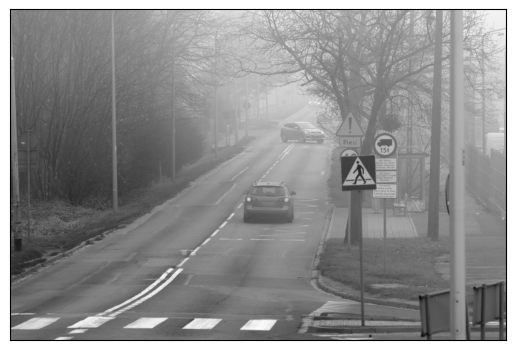

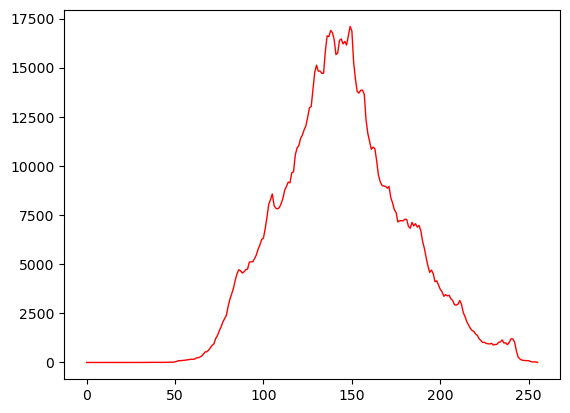

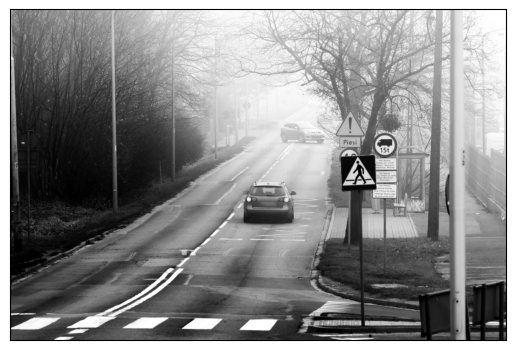

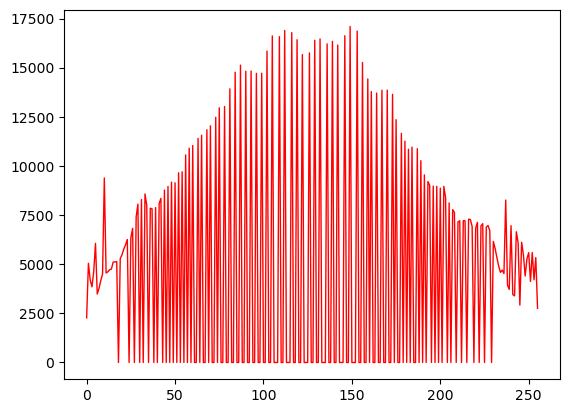

In [4]:
# 히스토그램 평활화하기

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('./data/ch3/mistyroad.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # 명암 영상으로 반환하고 출력
plt.imshow(gray, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

h = cv.calcHist([gray], [0], None, [256], [0, 256]) # 히스토그램을 구해 출력
plt.plot(h, color = 'r', linewidth = 1)
plt.show()

equal = cv.equalizeHist(gray) # 히스토그램을 평활화하고 출력
plt.imshow(equal, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

h = cv.calcHist([equal], [0], None, [256], [0, 256]) # 히스토그램을 구해 출력
plt.plot(h, color = 'r', linewidth = 1)
plt.show()

# 영역 연산

## 컨볼루션

In [5]:
# 컨볼루션 적용(가우시간 스무딩과 엠보싱)하기

import cv2 as cv
import numpy as np

img = cv.imread('./data/ch2/soccer.jpg')
img = cv.resize(img, dsize = (0, 0), fx = 0.4, fy = 0.4)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.putText(gray, 'soccer', (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
cv.imshow('Original', gray)

smooth = np.hstack((cv.GaussianBlur(gray, (5, 5), 0.0), cv.GaussianBlur(gray, (9, 9), 0.0), cv.GaussianBlur(gray, (15, 15), 0.0)))
cv.imshow('Smooth', smooth)

femboss = np.array([[-1.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0],
                    [0.0, 0.0, 1.0]])

gray16 = np.int16(gray)
emboss = np.uint8(np.clip(cv.filter2D(gray16, -1, femboss) + 128, 0, 255))
emboss_bad = np.uint8(cv.filter2D(gray16, -1, femboss) + 128)
emboss_worse = cv.filter2D(gray, -1, femboss)

cv.imshow('Emboss', emboss)
cv.imshow('Emboss_bad', emboss_bad)
cv.imshow('Emboss_worse', emboss_worse)

cv.waitKey()
cv.destroyAllWindows()

# 기하 연산

영상의 크기를 조절하거나 영상을 회전

## 보간을 이용한 영상 변환

In [1]:
# 보간을 이용해 영상의 기하 변환하기

import cv2 as cv

img = cv.imread('./data/ch3/rose.png') # 컬러 영상을 읽어오기
patch = img[250:350, 170:270, :] # 100 X 100 패치를 잘라 patch에 저장

# 오려낸 곳을 파란 박스로 표시
img = cv.rectangle(img, (170, 250), (270, 350), (255, 0, 0), 3)

# 오려낸 패치에 최근접 이웃, 양성형, 양3차 보간 방법을 적용해 5배로 확대
patch1 = cv.resize(patch, dsize = (0, 0), fx = 5, fy = 5, interpolation = cv.INTER_NEAREST)
patch2 = cv.resize(patch, dsize = (0, 0), fx = 5, fy = 5, interpolation = cv.INTER_LINEAR)
patch3 = cv.resize(patch, dsize = (0, 0), fx = 5, fy = 5, interpolation = cv.INTER_CUBIC)

# 확돼된 영상을 윈도우에 디스플레이한다
cv.imshow('Original', img)
cv.imshow('Resize nearest', patch1)
cv.imshow('Resize bilinear', patch2)
cv.imshow('Resize bicubic', patch3)

cv.waitKey()
cv.destroyAllWindows()

# OpenCV의 시간 효율

In [3]:
# 직접 작성한 함수와 OpenCV가 제공하는 함수의 시간 비교하기

import cv2 as cv
import numpy as np
import time

# 모든 화소에 접근해 컬러를 명암으로 변환한다
def my_cvtGray1(bgr_img):
    g = np.zeros([bgr_img.shape[0], bgr_img.shape[1]])
    for r in range(bgr_img.shape[0]):
        for c in range(bgr_img.shape[1]):
            g[r, c] = 0.114 * bgr_img[r, c, 0] + 0.587 * bgr_img[r, c, 1] + 0.299 * bgr_img[r, c, 2]
        return np.uint8(g)

# 파이썬의 배열 연산을 구현
def my_cvtGray2(bgr_img):
    g = np.zeros([bgr_img.shape[0], bgr_img.shape[1]])
    g = 0.144 * bgr_img[:, :, 0] + 0.587 * bgr_img[:, :, 1] + 0.299 * bgr_img[:, :, 2]
    return np.uint8(g)

img = cv.imread('./data/ch2/girl_laughing.jpg')

start = time.time()
my_cvtGray1(img)
print('My time1 : ', time.time() - start)

start = time.time()
my_cvtGray2(img)
print('My time2 : ', time.time() - start)

start = time.time()
cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print('OpenCV time : ', time.time() - start)

My time1 :  0.01123666763305664
My time2 :  0.02370762825012207
OpenCV time :  0.0033111572265625
